#Question 3 K-Fold Cross Validation
## Importing Libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [60]:
X, Y=load_diabetes(return_X_y=True,as_frame=True)
X=X[['age','sex','bmi','bp']]
X.head()

,age,sex,bmi,bp
0,0.038076,0.050680,0.061696,0.021872
1,-0.001882,-0.044642,-0.051474,-0.026328
2,0.085299,0.050680,0.044451,-0.005670
3,-0.089063,-0.044642,-0.011595,-0.036656
4,0.005383,-0.044642,-0.036385,0.021872


In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

##Defining the pipeline and fitting the model

In [62]:
CVS=[]
numfeat=np.arange(1,11)
for i in numfeat:
  pipeN=Pipeline([('poly',PolynomialFeatures(i,include_bias=False)),('scaler',StandardScaler()),('Reg',LinearRegression())])
  score=cross_val_score(pipeN,X_train,y_train,cv=5,scoring='r2')
  CVS.append(np.mean(score))
CVS=np.array(CVS)
CVS#Cross val scores with [1,11] degrees

array([ 3.93641813e-01,  4.01192793e-01,  3.49451047e-01,  1.19133327e-01,
       -8.16563043e-01, -1.80042346e+01, -1.57526685e+03, -1.90587789e+06,
       -6.41136380e+06, -1.49176411e+06])

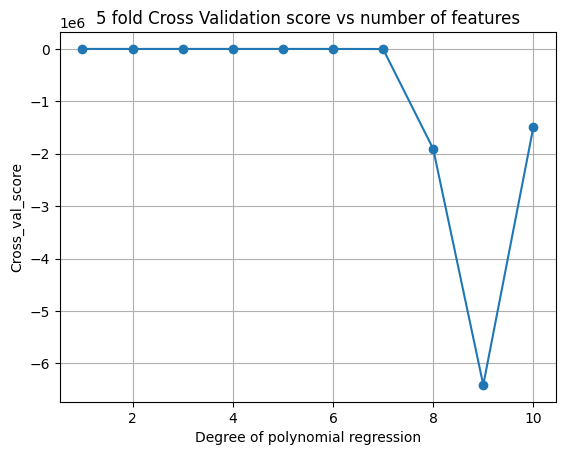

In [63]:
plt.plot(numfeat,CVS,marker='o')
plt.title("5 fold Cross Validation score vs number of features")
plt.xlabel("Degree of polynomial regression")
plt.ylabel("Cross_val_score")
plt.grid()
plt.show()

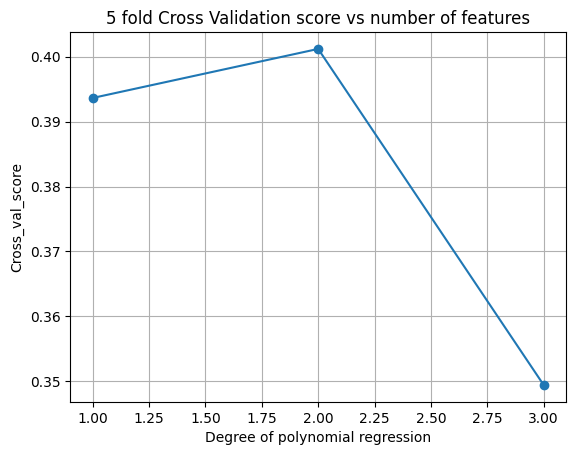

In [64]:
#Closer look
plt.plot(numfeat[:3],CVS[:3],marker='o')
plt.grid()
plt.title("5 fold Cross Validation score vs number of features")
plt.xlabel("Degree of polynomial regression")
plt.ylabel("Cross_val_score")
plt.show()

## Highest CV score corresponds to number of features = 2 and Cross_val_score = 0.4